In [1]:
# given only the first 3 points. All the next steps are based on the previous prediction. It diverges soon.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from DummyData import *

In [2]:
def split_sequence(sequence, n_steps):
  X, y = [], []
  for i in range(len(sequence)):
    end_ix=i+n_steps
    if end_ix > len(sequence)-1:
      break
    seq_x, seq_y=sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x), y.append(seq_y)
  return np.asarray(X), np.asarray(y)

In [3]:
f=f0
# print(f(1))
# print(f4(1))
#raw_seq=[i for i in range(10, 100, 10)]
raw_seq=[f(i) for i in range(1,2000)]
#raw_seq
# plt.plot(raw_seq)
# plt.show

In [4]:
n_step=3
X,y=split_sequence(raw_seq,n_step)
#X, y

n_features=1
X2=X.reshape((X.shape[0],X.shape[1],n_features))

In [5]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_step,n_features)))
# model.add(SimpleRNN(50,activation='relu',input_shape=(n_step,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [6]:
fit_results=model.fit(X2,y,epochs=100,verbose=0)

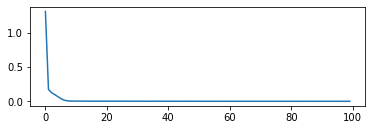

In [7]:
# print(fit_results.history)
plt.figure()
plt.subplot(211)
plt.plot(fit_results.history['loss'])

<function matplotlib.pyplot.show(*args, **kw)>

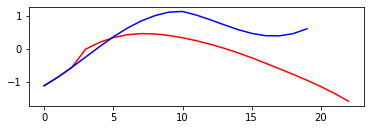

In [48]:
# prediction with sequence:

psteps = 20
test_raw_seq=[f(i) for i in range(4200,4200 + psteps)]
# print(test_raw_seq[0:3])
test_X=np.asarray(test_raw_seq[0:3])
test_X2=test_X.reshape(1,3,1)
test_y_predict_1=model(test_X2)
test_X_full=test_raw_seq[0:3]
# print(test_y_predict_1.numpy().item())
for i in range(psteps):
        test_X[0:2]=test_X[1:3] 
        test_X[2]=test_y_predict_1.numpy().item()
#         print(test_X)
        test_X2=test_X.reshape(1,3,1)
        test_y_predict_1=model(test_X2)
        test_X_full.append(test_y_predict_1.numpy().item())
#         print(test_X_full)
plt.subplot(212)
# plt.plot([i for i in range(len(test_raw_seq)-n_step)],test_y_predict.numpy())
# plt.scatter([i for i in range(50)], test_X,s=3, c='red')
plt.plot(test_X_full, c='red')
plt.plot(test_raw_seq, c='blue')
plt.show          